In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

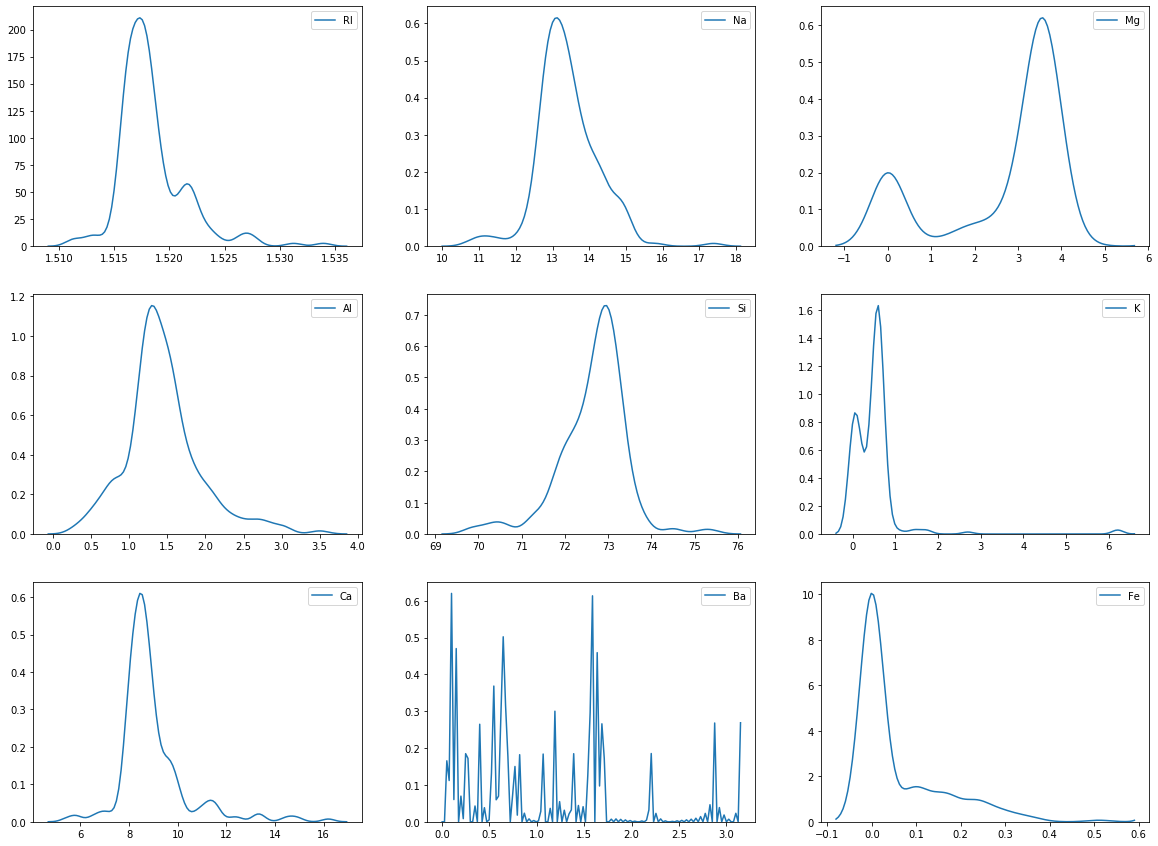

In [8]:
f,ax = plt.subplots(3,3, figsize = (20,15))
sns.kdeplot(df['RI'], ax = ax[0,0])
sns.kdeplot(df['Na'], ax = ax[0,1])
sns.kdeplot(df['Mg'], ax = ax[0,2])
sns.kdeplot(df['Al'], ax = ax[1,0])
sns.kdeplot(df['Si'], ax = ax[1,1])
sns.kdeplot(df['K'], ax = ax[1,2])
sns.kdeplot(df['Ca'], ax = ax[2,0])
sns.kdeplot(df['Ba'], ax = ax[2,1])
sns.kdeplot(df['Fe'], ax = ax[2,2])
plt.show()

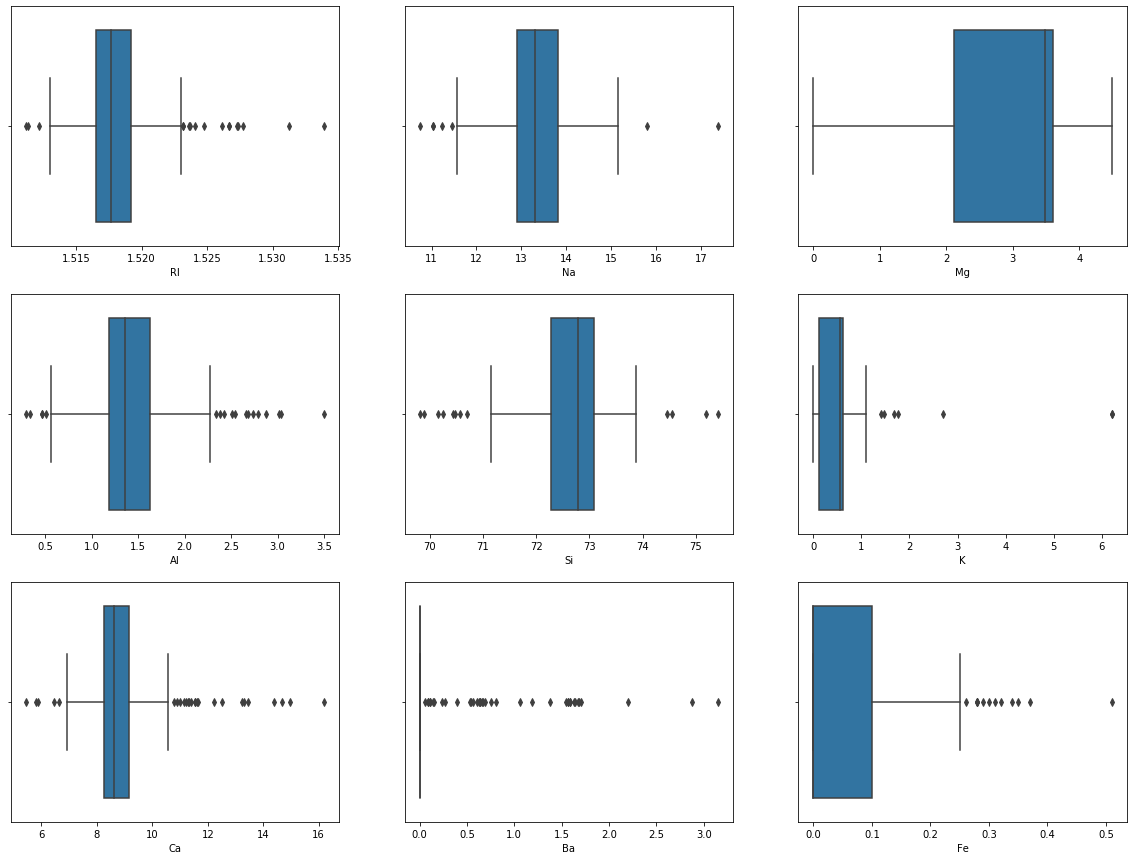

In [9]:
f,ax = plt.subplots(3,3, figsize = (20,15))
sns.boxplot(df['RI'], ax = ax[0,0])
sns.boxplot(df['Na'], ax = ax[0,1])
sns.boxplot(df['Mg'], ax = ax[0,2])
sns.boxplot(df['Al'], ax = ax[1,0])
sns.boxplot(df['Si'], ax = ax[1,1])
sns.boxplot(df['K'], ax = ax[1,2])
sns.boxplot(df['Ca'], ax = ax[2,0])
sns.boxplot(df['Ba'], ax = ax[2,1])
sns.boxplot(df['Fe'], ax = ax[2,2])
plt.show()

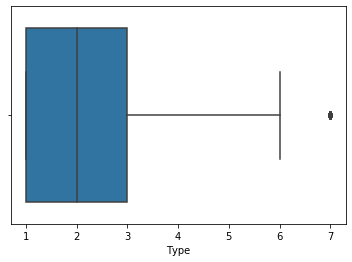

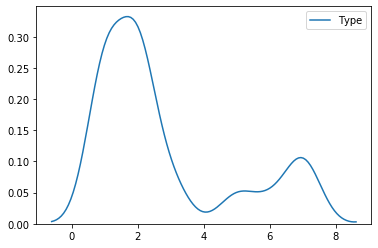

In [11]:
sns.boxplot(df['Type'])
plt.show()

sns.kdeplot(df['Type'])
plt.show()

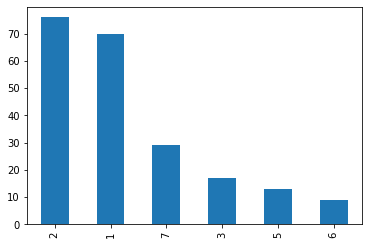

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


In [12]:
df['Type'].value_counts().plot.bar()
plt.show()
print(df['Type'].value_counts())

In [13]:
X = df.drop(columns = 'Type')
y = df['Type']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [22]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3, min_samples_leaf=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

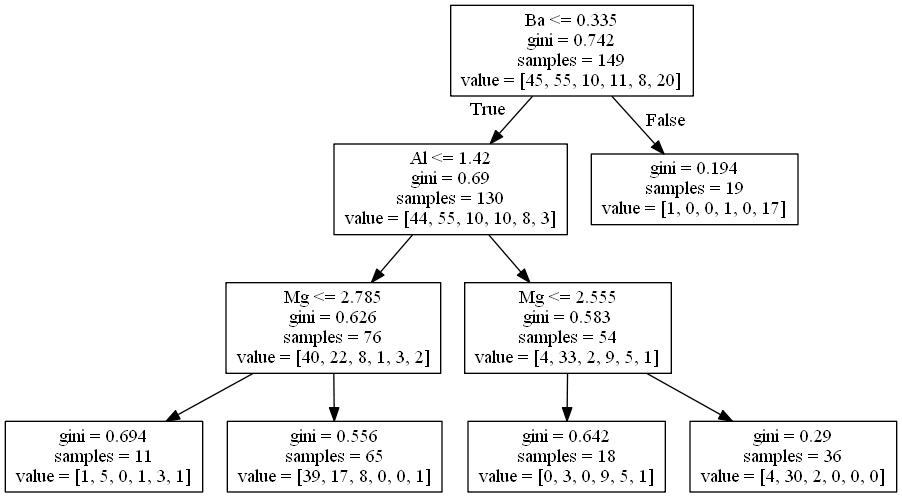

In [24]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus


features = X.columns
dot_data = export_graphviz(dt, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [26]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)

print('Accuracy of Decision Tree on Train:', accuracy_score(y_train, y_pred_train))
print('Accuracy of Decision Tree on Test:', accuracy_score(y_test, y_pred_test))

Accuracy of Decision Tree on Train: 0.6711409395973155
Accuracy of Decision Tree on Test: 0.7384615384615385


## Hyperparameter Tunning for Decision Tree

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
from scipy.stats import randint as sp_randint

dt1 = DecisionTreeClassifier(random_state = 1)

params = {'max_depth' : sp_randint(2,15),
         'min_samples_split' : sp_randint(2,100),
         'min_samples_leaf' : sp_randint(1,20),
         'criterion' : ['entropy', 'gini']}

rand_search_dt = RandomizedSearchCV(dt1, param_distributions = params, cv = 3, random_state = 1)

rand_search_dt.fit(X, y)
print(rand_search_dt.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 17, 'min_samples_split': 3}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Building Model on above best parameters

In [30]:
dt1 = DecisionTreeClassifier(**rand_search_dt.best_params_)
dt1.fit(X_train, y_train)

y_pred_train = dt1.predict(X_train)
y_pred_test = dt1.predict(X_test)

y_prob_train = dt1.predict_proba(X_train)
y_prob_test = dt1.predict_proba(X_test)

print('Accuracy of Decision Tree on Train:', accuracy_score(y_train, y_pred_train))
print('Accuracy of Decision Tree on Test:', accuracy_score(y_test, y_pred_test))

Accuracy of Decision Tree on Train: 0.6040268456375839
Accuracy of Decision Tree on Test: 0.6615384615384615


## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 15, random_state = 1)

rfc.fit(X_train,y_train)

y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

y_prob_train = rfc.predict_proba(X_train)
y_prob_test = rfc.predict_proba(X_test)

print('Accuracy of Random Forest on Train:', accuracy_score(y_train, y_pred_train))
print('Accuracy of Random Forest on Test:', accuracy_score(y_test, y_pred_test))

Accuracy of Random Forest on Train: 0.9932885906040269
Accuracy of Random Forest on Test: 0.8


## Hyperparameter tuning for Random Forest

In [41]:
rfc1 = RandomForestClassifier(random_state = 1)

params = {'n_estimators' : sp_randint(2,25),
         'max_depth' : sp_randint(2,15),
         'max_features' : sp_randint(2,9),
         'criterion' : ['gini', 'entropy']}

rand_search_rfc = RandomizedSearchCV(rfc1, param_distributions = params, cv=3, random_state = 1)

rand_search_rfc.fit(X,y)

print(rand_search_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 6, 'n_estimators': 7}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Building Model on the above best feature

In [45]:
rfc1 = RandomForestClassifier(**rand_search_rfc.best_params_)

rfc1.fit(X_train,y_train)

y_pred_train = rfc1.predict(X_train)
y_pred_test = rfc1.predict(X_test)

y_prob_train = rfc1.predict_proba(X_train)
y_prob_test = rfc1.predict_proba(X_test)

print('Accuracy of Random Forest on Train:', accuracy_score(y_train, y_pred_train))
print('Accuracy of Random Forest on Test:', accuracy_score(y_test, y_pred_test))

Accuracy of Random Forest on Train: 0.8187919463087249
Accuracy of Random Forest on Test: 0.7538461538461538


## KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn = KNeighborsClassifier()
ss = StandardScaler()

Xs = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [47]:
knn.fit(X_trains, y_train)

y_pred_train = knn.predict(X_trains)
y_prob_train = knn.predict_proba(X_trains)[:,1]

y_pred = knn.predict(X_tests)
y_prob = knn.predict_proba(X_tests)[:,1]

print('Accuracy of kNN-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of kNN-Test: ', accuracy_score(y_pred, y_test))

Accuracy of kNN-Train:  0.7651006711409396
Accuracy of kNN-Test:  0.7076923076923077


## Hyperparameter Tunning for KNN

In [53]:
knn = KNeighborsClassifier()

params = {'n_neighbors' : sp_randint(1,20),
         'p' : sp_randint(1,5)}

rand_search_knn = RandomizedSearchCV(knn, param_distributions = params, cv=3, random_state = 1)

rand_search_knn.fit(X,y)

print(rand_search_knn.best_params_)

{'n_neighbors': 13, 'p': 1}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Now building model on the above best features

In [54]:
knn1 = KNeighborsClassifier(**rand_search_knn.best_params_)

knn1.fit(X_trains, y_train)

y_pred_train = knn1.predict(X_trains)
y_pred_test = knn1.predict(X_tests)

y_prob_train = knn1.predict_proba(X_trains)
y_prob_test = knn1.predict_proba(X_tests)

print('Accuracy of KNN on Train:', accuracy_score(y_train, y_pred_train))
print('Accuracy of KNN on Test:', accuracy_score(y_test, y_pred_test))

Accuracy of KNN on Train: 0.697986577181208
Accuracy of KNN on Test: 0.7384615384615385


## Stacking Algorithms

In [55]:
from sklearn.ensemble import VotingClassifier

In [56]:
dt1 = DecisionTreeClassifier(**rand_search_dt.best_params_)
rfc1 = RandomForestClassifier(**rand_search_rfc.best_params_)
knn1 = KNeighborsClassifier(**rand_search_knn.best_params_)

In [57]:
clf = VotingClassifier(estimators = [('dt', dt1), ('rfc', rfc1), ('knn', knn1)], voting = 'soft')

clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

y_prob_train = clf.predict_proba(X_train)
y_prob_test = clf.predict_proba(X_test)

print('Accuracy of Stacking Algorithm on Train:', accuracy_score(y_train, y_pred_train))
print('Accuracy of Stacking Algorithm on Test:', accuracy_score(y_test, y_pred_test))

Accuracy of Stacking Algorithm on Train: 0.7919463087248322
Accuracy of Stacking Algorithm on Test: 0.7846153846153846


## Stacking Algorithms with unequal weights

In [58]:
clf1 = VotingClassifier(estimators = [('dt', dt1), ('rfc', rfc1), ('knn', knn1)], voting = 'soft', weights = [1,3,2])

clf1.fit(X_train, y_train)

y_pred_train = clf1.predict(X_train)
y_pred_test = clf1.predict(X_test)

y_prob_train = clf1.predict_proba(X_train)
y_prob_test = clf1.predict_proba(X_test)

print('Accuracy of Stacking Algorithm on Train:', accuracy_score(y_train, y_pred_train))
print('Accuracy of Stacking Algorithm on Test:', accuracy_score(y_test, y_pred_test))

Accuracy of Stacking Algorithm on Train: 0.7986577181208053
Accuracy of Stacking Algorithm on Test: 0.8
